In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report

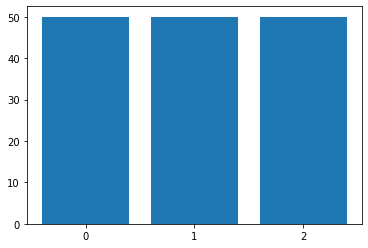

In [3]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names
labels, counts = np.unique(y, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()

In [4]:
print(class_names)
print(y)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [7]:
# Fit the classifier
classifier = svm.SVC(kernel='linear').fit(X_train, y_train)
print(X_train)
print(y_train)

[[5.9 3.  4.2 1.5]
 [5.8 2.6 4.  1.2]
 [6.8 3.  5.5 2.1]
 [4.7 3.2 1.3 0.2]
 [6.9 3.1 5.1 2.3]
 [5.  3.5 1.6 0.6]
 [5.4 3.7 1.5 0.2]
 [5.  2.  3.5 1. ]
 [6.5 3.  5.5 1.8]
 [6.7 3.3 5.7 2.5]
 [6.  2.2 5.  1.5]
 [6.7 2.5 5.8 1.8]
 [5.6 2.5 3.9 1.1]
 [7.7 3.  6.1 2.3]
 [6.3 3.3 4.7 1.6]
 [5.5 2.4 3.8 1.1]
 [6.3 2.7 4.9 1.8]
 [6.3 2.8 5.1 1.5]
 [4.9 2.5 4.5 1.7]
 [6.3 2.5 5.  1.9]
 [7.  3.2 4.7 1.4]
 [6.5 3.  5.2 2. ]
 [6.  3.4 4.5 1.6]
 [4.8 3.1 1.6 0.2]
 [5.8 2.7 5.1 1.9]
 [5.6 2.7 4.2 1.3]
 [5.6 2.9 3.6 1.3]
 [5.5 2.5 4.  1.3]
 [6.1 3.  4.6 1.4]
 [7.2 3.2 6.  1.8]
 [5.3 3.7 1.5 0.2]
 [4.3 3.  1.1 0.1]
 [6.4 2.7 5.3 1.9]
 [5.7 3.  4.2 1.2]
 [5.4 3.4 1.7 0.2]
 [5.7 4.4 1.5 0.4]
 [6.9 3.1 4.9 1.5]
 [4.6 3.1 1.5 0.2]
 [5.9 3.  5.1 1.8]
 [5.1 2.5 3.  1.1]
 [4.6 3.4 1.4 0.3]
 [6.2 2.2 4.5 1.5]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [4.8 3.  1.4 0.1]
 [7.1 3.  5.9 2.1]
 [6.9 3.2 5.7 2.3]
 [6.5 3.  5.8 2.2]
 [6.4 2.8 5.6 2.1]
 [5.1 3.8 1.6 0.2]
 [4.8 3.4 1.6 0.2]
 [6.5 3.2 5.1 2. ]
 [6.7 3.3 5.

In [8]:
# Predict the labels of the test set samples
predicted_labels = classifier.predict(X_test)


In [19]:
print(predicted_labels)
print(type(predicted_labels))

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
<class 'numpy.ndarray'>


In [20]:
# Build the confusion matrix of our 3-class classification problem
cnf_matrix = confusion_matrix(y_test, predicted_labels)
print(cnf_matrix)
print(type(y_test))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
<class 'numpy.ndarray'>


In [11]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

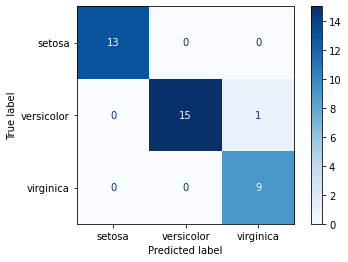

In [9]:
disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
plt.show()

In [23]:
print(cnf_matrix.sum(axis=0))
print(np.diag(cnf_matrix) )
print(cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) )

[13 15 10]
[13 15  9]
[0 0 1]


In [25]:
print(cnf_matrix.sum(axis=1))
print(np.diag(cnf_matrix))
print(cnf_matrix.sum(axis=1) - np.diag(cnf_matrix))

[13 16  9]
[13 15  9]
[0 1 0]


In [11]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

In [12]:
FP

array([0., 0., 1.])

In [13]:
FN

array([0., 1., 0.])

In [14]:
TP

array([13., 15.,  9.])

In [15]:
TN

array([25., 22., 28.])

In [16]:
TPR

array([1.    , 0.9375, 1.    ])

In [20]:
PPV

array([1. , 1. , 0.9])

In [19]:
# Print the precision and recall, among other metrics
print(classification_report(y_test, predicted_labels, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        13
           1      1.000     0.938     0.968        16
           2      0.900     1.000     0.947         9

    accuracy                          0.974        38
   macro avg      0.967     0.979     0.972        38
weighted avg      0.976     0.974     0.974        38

